In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "student_habits_performance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jayaantanaath/student-habits-vs-academic-performance",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\Henry\AppData\Local\Temp\ipykernel_14608\1133775039.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


---

# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [4]:
df.drop('student_id', axis=1, inplace=True)

In [5]:
print("="*50+" Checking NaN value "+"="*50)
columns_nan = []

print(f"Checking if any record with NaN value:")
for column in df.columns:
    print("="*60)
    print(f"Checking columns {column}")
    
    if df[column].isnull().sum() == 0:
        print(f"Column: {column} Ok!")
        print("="*60)
    else:
        print(f"Column: {column} Found NaN!")
        columns_nan.append({
            column: df[column].isnull().sum()
        })

for column in columns_nan:
    print(f"Found NaN values: {column}")

print()

print()

print("="*50+" Duplicate records "+"="*50)
print(f"{df.duplicated().sum()} records duplicated")
print("Removing duplicated records...")
if df.duplicated().sum() > 0:
    print(f"Remove {df.duplicated().sum()} records !")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicated value")

print("="*100)
print()

print("="*50+" Cheking Describe DataFrame "+"="*50)
df.describe()

================================================== Checking NaN value ==================================================
Checking if any record with NaN value:
Checking columns age
Column: age Ok!
Checking columns gender
Column: gender Ok!
Checking columns study_hours_per_day
Column: study_hours_per_day Ok!
Checking columns social_media_hours
Column: social_media_hours Ok!
Checking columns netflix_hours
Column: netflix_hours Ok!
Checking columns part_time_job
Column: part_time_job Ok!
Checking columns attendance_percentage
Column: attendance_percentage Ok!
Checking columns sleep_hours
Column: sleep_hours Ok!
Checking columns diet_quality
Column: diet_quality Ok!
Checking columns exercise_frequency
Column: exercise_frequency Ok!
Checking columns parental_education_level
Column: parental_education_level Found NaN!
Checking columns internet_quality
Column: internet_quality Ok!
Checking columns mental_health_rating
Column: mental_health_rating Ok!
Checking columns extracurricular_participa

age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.000000   
25%                78.000000     5.600000            1.000000   
50%                84.400000     6.500000            3.000000   
75%                91.025000     7.300000            5.000000   
max               100.000000    10.000000            6.000000   

       mental_health_rating   exam_score  
count           1000.000000  1000.000000  
mean               5.438000    69.601500  
std                2.847501    16.888564  
min                1.000000    18.400000  
25%                3.000000    58.475000  
50%                5.000000    70.500000  
75%                8.000000    81.325000  
max               10.000000   100.000000

In [6]:
sns.countplot(x='extracurricular_participation', data=df)

<Axes: xlabel='extracurricular_participation', ylabel='count'>

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

<Axes: >

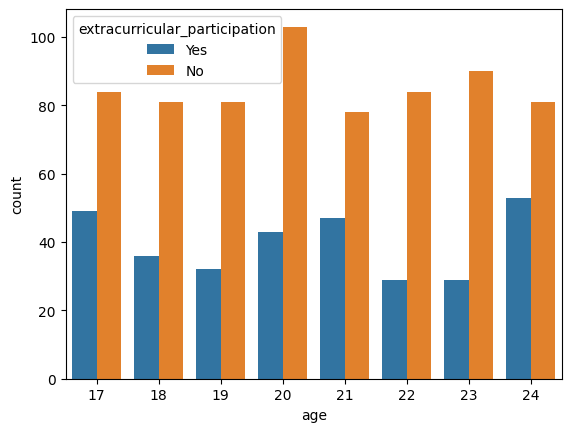

In [8]:
columns = ['age', 'gender']

for column in columns:
    sns.countplot(x=column, hue='extracurricular_participation', data=df)

    plt.show()

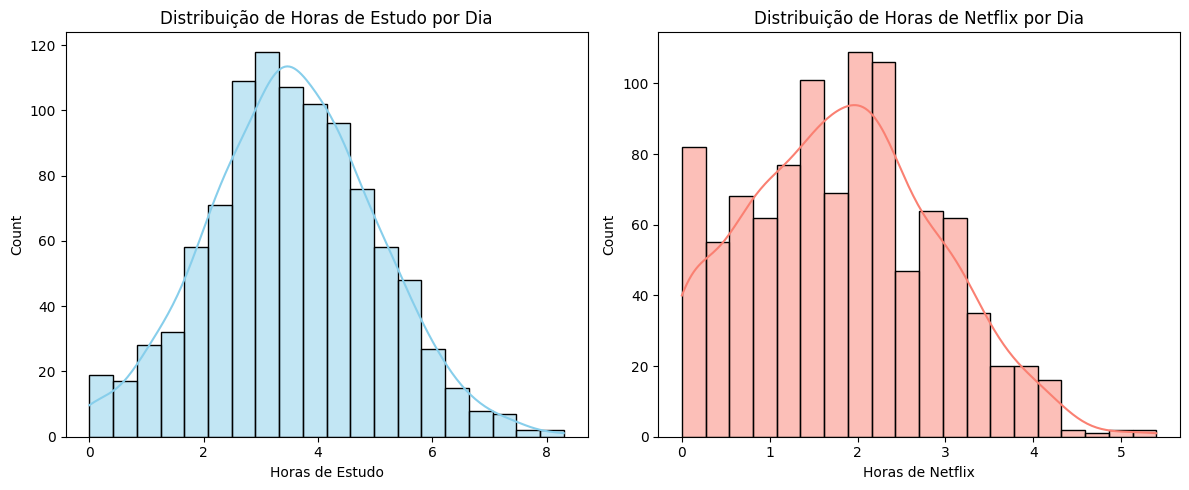

In [9]:
plt.figure(figsize=(12, 5))

# Study Hour Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['study_hours_per_day'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Horas de Estudo por Dia')
plt.xlabel('Horas de Estudo')

# Netflix Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['netflix_hours'], bins=20, kde=True, color='salmon')
plt.title('Distribuição de Horas de Netflix por Dia')
plt.xlabel('Horas de Netflix')

plt.tight_layout()
plt.show()

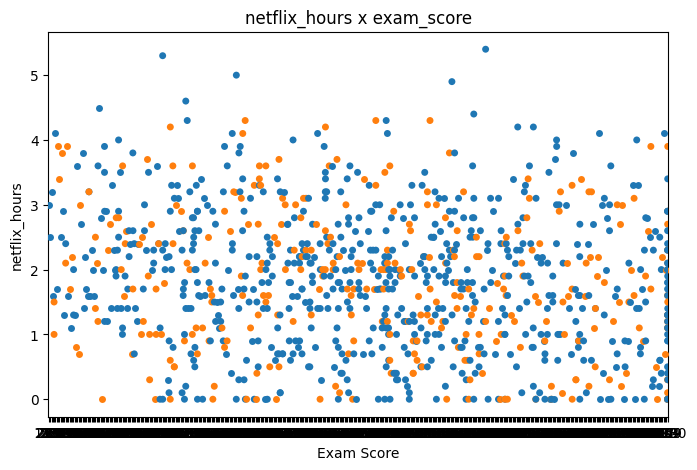

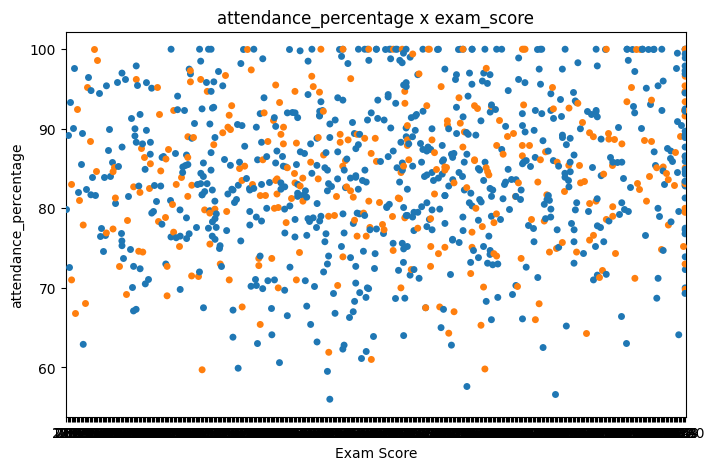

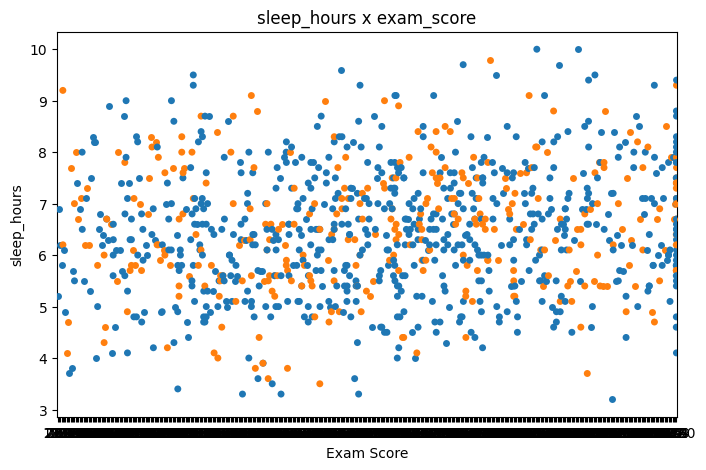

In [12]:
columns = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours']

for column in columns:
    plt.figure(figsize=(8, 5))
    sns.stripplot(x='exam_score', y=column, data=df, jitter=True, hue='extracurricular_participation', legend=False)
    plt.title(f'{column} x exam_score')
    plt.xlabel('Exam Score')
    plt.show()

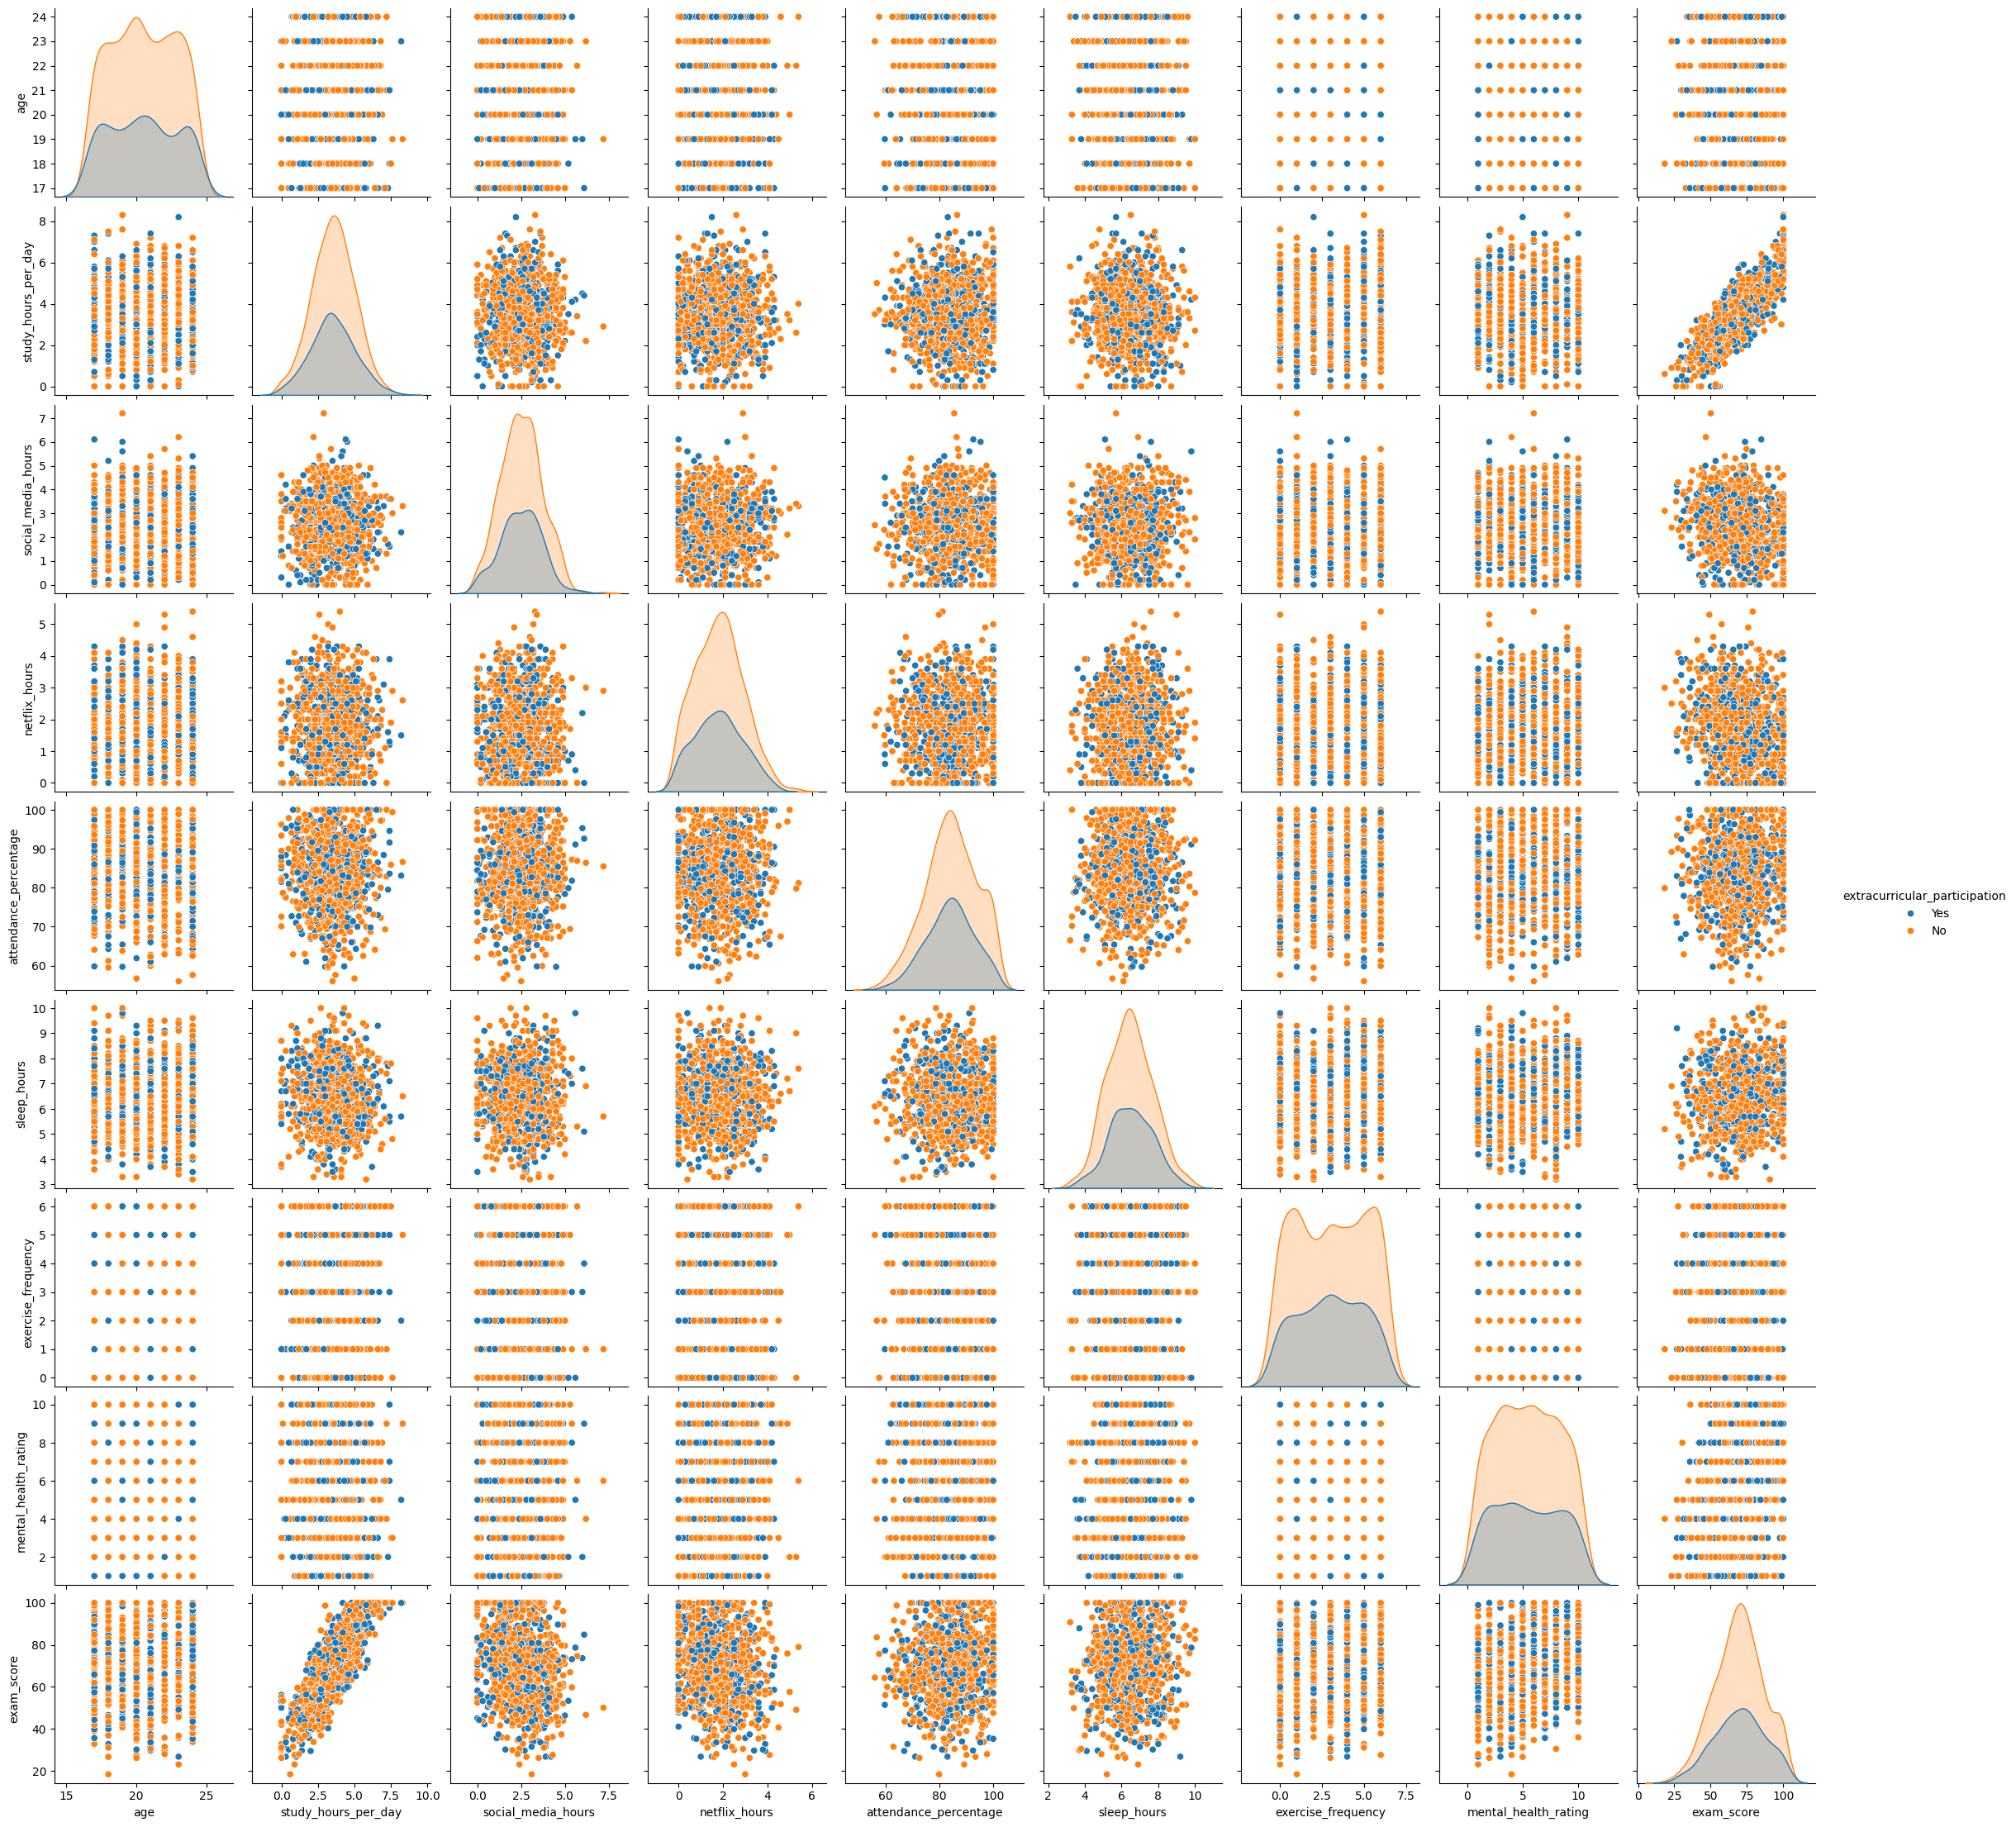

In [13]:
sns.pairplot(hue='extracurricular_participation', data=df)

- Classes desbalanceadas, sendo `No` como a classe majoritária
- Forte correlação entre `exam_score` e `study_hours_per_day`, o que pode indiciar que o aluno com nota maior possui maior horas de estudo
- Com bases na colunas `study_hours_per_day`, `social_media_hours`, `netflix_hours`, `attendance_percentage`, `sleep_hours`, não houve indicadores fortes que influencie uma tendência em `exam_score`.
- `mental_heatlh_rating` e `exam_score` possui uma moderada correlação, o que pode indiciar que alunos com nota maior possui uma saúde mental pior.

# Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
df.isnull().mean()

age                              0.000
gender                           0.000
study_hours_per_day              0.000
social_media_hours               0.000
netflix_hours                    0.000
part_time_job                    0.000
attendance_percentage            0.000
sleep_hours                      0.000
diet_quality                     0.000
exercise_frequency               0.000
parental_education_level         0.091
internet_quality                 0.000
mental_health_rating             0.000
extracurricular_participation    0.000
exam_score                       0.000
dtype: float64

In [16]:
# Checking string values
for column in df.select_dtypes(include='object').columns:
    print(f"The column {column}: {df[column].unique()}")

The column gender: ['Female' 'Male' 'Other']
The column part_time_job: ['No' 'Yes']
The column diet_quality: ['Fair' 'Good' 'Poor']
The column parental_education_level: ['Master' 'High School' 'Bachelor' nan]
The column internet_quality: ['Average' 'Poor' 'Good']
The column extracurricular_participation: ['Yes' 'No']


In [17]:
df = pd.get_dummies(df, columns=['gender'], dtype=int)

map_part_time_job = {
    'No': 0,
    'Yes': 1
}

map_diet_quality = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2
}

map_internet_quality = {
    'Poor': 0,
    'Average': 1,
    'Good': 2
}

map_extracurricular_participation = {
    'No': 0,
    'Yes': 1
}

df['part_time_job'] = df['part_time_job'].map(map_part_time_job)
df['diet_quality'] = df['diet_quality'].map(map_diet_quality)
df['internet_quality'] = df['internet_quality'].map(map_internet_quality)
df['extracurricular_participation'] = df['extracurricular_participation'].map(map_extracurricular_participation)

In [18]:
# Representação de aproximadamente 10% do dados
from sklearn.impute import KNNImputer

scaler = LabelEncoder()

df_temp = df.copy()

df_temp['parental_education_level_label'] = scaler.fit_transform(df['parental_education_level'])

In [19]:
df_temp.corr(numeric_only=True)['parental_education_level_label'].sort_values(ascending=False)

# Nenhuma features com correlação alta para imputação por pontos mais próximos

parental_education_level_label    1.000000
gender_Other                      0.058648
study_hours_per_day               0.030007
social_media_hours                0.023007
part_time_job                     0.013524
attendance_percentage             0.006354
internet_quality                  0.001884
age                               0.000692
gender_Female                    -0.003239
extracurricular_participation    -0.010711
sleep_hours                      -0.019409
gender_Male                      -0.020313
netflix_hours                    -0.021198
diet_quality                     -0.023226
exam_score                       -0.025821
exercise_frequency               -0.029976
mental_health_rating             -0.093047
Name: parental_education_level_label, dtype: float64

In [20]:
# Adicionar uma nova categória para valores NaN, para não introduzir o viés 
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

df = pd.get_dummies(df, columns=['parental_education_level'], dtype=int)

In [21]:
X = df.drop('exam_score', axis=1).values
y = df['exam_score'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [23]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaler = scaler_x.fit_transform(X_train)
X_test_scaler = scaler_x.transform(X_test)

y_train_scaler = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Model

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [25]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Ridge': Ridge(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [26]:
metrics = []

for name, model in models.items():

    print(f"Initializing model training: {name}")
    
    model.fit(X_train_scaler, y_train_scaler.ravel())

    predict_scaler = model.predict(X_test_scaler)

    predict_inverse = scaler_y.inverse_transform(predict_scaler.reshape(-1, 1))

    rmse = root_mean_squared_error(y_test, predict_inverse)
    mae = mean_absolute_error(y_test, predict_inverse)
    r2 = r2_score(y_test, predict_inverse)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}")
    print("="*100)

    metrics.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

metrics_df = pd.DataFrame(metrics)

Initializing model training: Random Forest
RMSE: 6.218209764474015
MAE: 4.949774999999999
R2: 0.8492131615399838
Initializing model training: Gradient Boosting
RMSE: 5.579763510742243
MAE: 4.696443299272903
R2: 0.8785872534690424
Initializing model training: Decision Tree
RMSE: 9.296262689920075
MAE: 7.44
R2: 0.6629848119887298
Initializing model training: Ridge
RMSE: 5.164746778317674
MAE: 4.215403949945718
R2: 0.8959766668438327
Initializing model training: XGBoost
RMSE: 6.196773303271753
MAE: 5.120987998962403
R2: 0.8502510051661941


# Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid_models = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },

    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.6, 0.8, 1.0],
        'min_samples_split': [2, 5, 10]
    },

    'Decision Tree': {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },

    'Ridge': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },

    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

metrics_tuning = []

for name, param in param_grid_models.items():
    print(f"Train and Tuning model: {name}")
    model = models[name]

    grid = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

    grid.fit(X_train_scaler, y_train_scaler.ravel())

    print(f"Find Best Model: {grid.best_estimator_}")

    tuned_model = grid.best_estimator_

    tuned_model.fit(X_train_scaler, y_train_scaler.ravel())

    pred_scaled = tuned_model.predict(X_test_scaler)
    pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))

    rmse = root_mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 =  r2_score(y_test, pred)

    metrics_tuning.append({
        'Model': name,
        'Best Estimator': grid.best_estimator_,
        'Best Param': grid.best_params_,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    print('-' * 50)

metrics_tuning_df = pd.DataFrame(metrics_tuning)

Train and Tuning model: Random Forest
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Find Best Model: RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300,
                      random_state=42)
Random Forest - RMSE: 7.3271, MAE: 5.6851, R²: 0.7906
--------------------------------------------------
Train and Tuning model: Gradient Boosting
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Find Best Model: GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42,
                          subsample=0.6)
Gradient Boosting - RMSE: 5.3367, MAE: 4.3797, R²: 0.8889
--------------------------------------------------
Train and Tuning model: Decision Tree
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Find Best Model: DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, random_state=42)
Decision Tree - RMSE: 14.6956, MAE: 11.0835, R²: 0.157

In [29]:
metrics_tuning_df

Model                                     Best Estimator  \
0      Random Forest  (DecisionTreeRegressor(max_depth=20, max_featu...   
1  Gradient Boosting  ([DecisionTreeRegressor(criterion='friedman_ms...   
2      Decision Tree  DecisionTreeRegressor(max_depth=10, max_featur...   
3              Ridge                 Ridge(alpha=0.01, random_state=42)   
4            XGBoost  XGBRegressor(base_score=None, booster=None, ca...   

                                          Best Param       RMSE        MAE  \
0  {'max_depth': 20, 'max_features': 'sqrt', 'min...   7.327117   5.685106   
1  {'learning_rate': 0.05, 'max_depth': 3, 'min_s...   5.336709   4.379738   
2  {'max_depth': 10, 'max_features': 'sqrt', 'min...  14.695580  11.083522   
3                                    {'alpha': 0.01}   5.115245   4.157024   
4  {'colsample_bytree': 0.6, 'learning_rate': 0.0...   5.376876   4.389606   

         R2  
0  0.790637  
1  0.888934  
2  0.157818  
3  0.897961  
4  0.887256

In [30]:
metrics_df

Model      RMSE       MAE        R2
0      Random Forest  6.218210  4.949775  0.849213
1  Gradient Boosting  5.579764  4.696443  0.878587
2      Decision Tree  9.296263  7.440000  0.662985
3              Ridge  5.164747  4.215404  0.895977
4            XGBoost  6.196773  5.120988  0.850251